In [1]:
## imports para el código de un caso de regresión lineal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [2]:
# Cargar el dataset de diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target  # 'target' es la variable dependiente

df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [3]:
# Seleccionar una variable independiente para regresión lineal simple (puedes experimentar con otras)
X = df[['bmi']]  # Índice de masa corporal
y = df['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados de la Regresión Lineal (con dataset de diabetes - BMI como predictor):")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print(f"Intercepto (beta_0): {model.intercept_:.2f}")
print(f"Pendiente (beta_1): {model.coef_[0]:.2f}")

Resultados de la Regresión Lineal (con dataset de diabetes - BMI como predictor):
Error Cuadrático Medio (MSE): 4061.83
Coeficiente de Determinación (R^2): 0.23
Intercepto (beta_0): 152.00
Pendiente (beta_1): 998.58


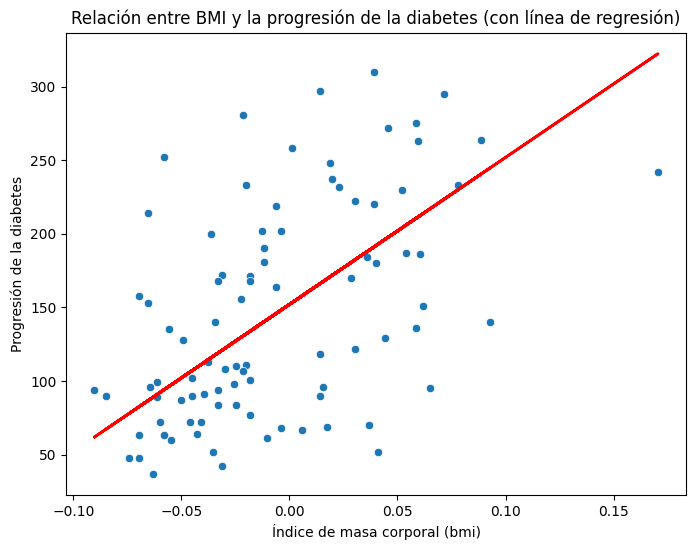

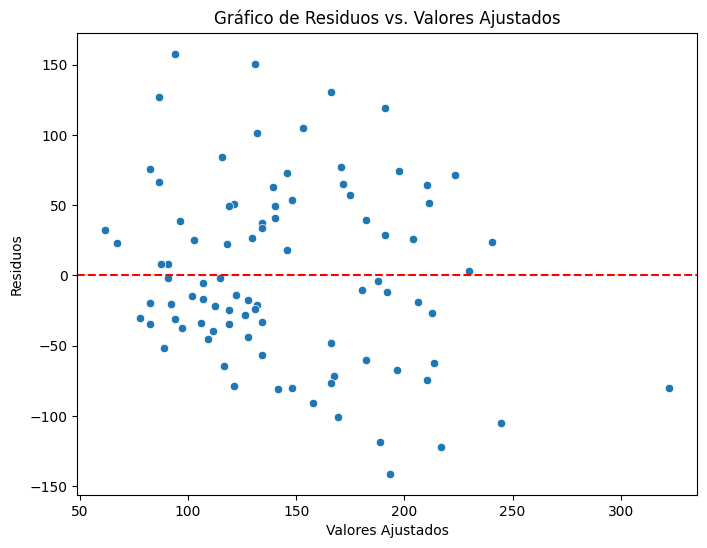

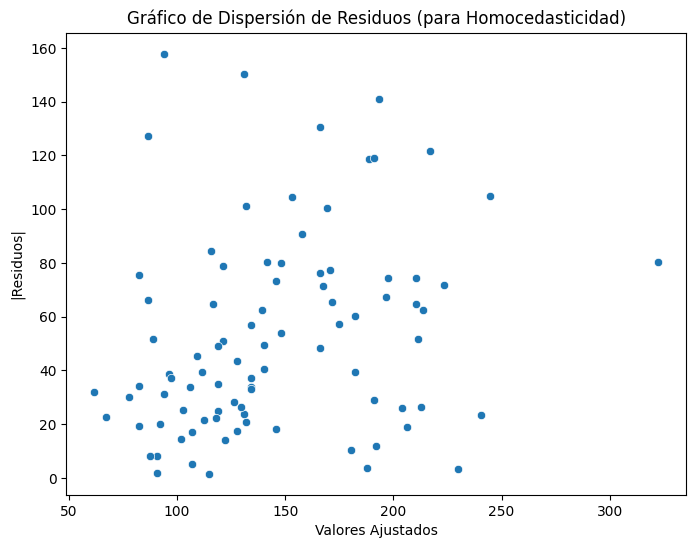

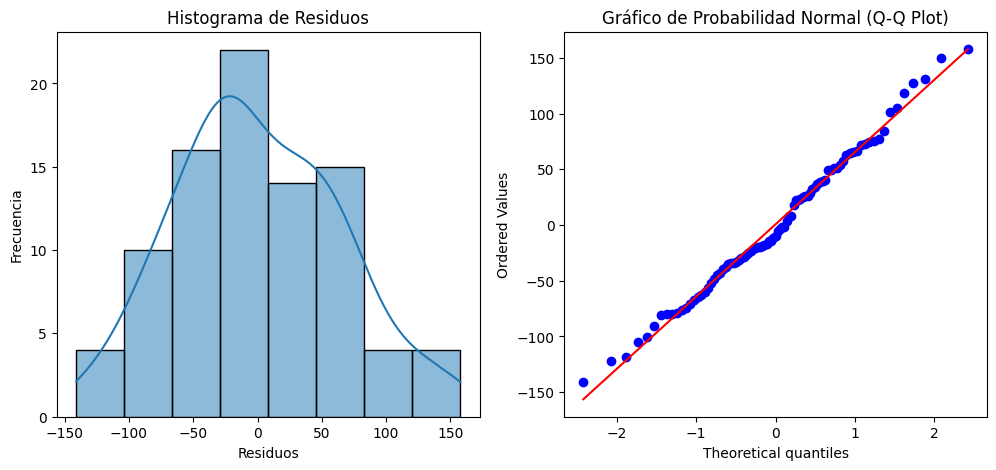


Resumen del modelo con statsmodels:
                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     202.4
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           1.40e-36
Time:                        09:37:41   Log-Likelihood:                -1958.2
No. Observations:                 353   AIC:                             3920.
Df Residuals:                     351   BIC:                             3928.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        15

In [5]:
# Comprobación de algunos supuestos (visualización)

# 1. Linealidad (Gráfico de dispersión)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['bmi'], y=y_test)
plt.plot(X_test['bmi'], y_pred, color='red', linewidth=2)
plt.title('Relación entre BMI y la progresión de la diabetes (con línea de regresión)')
plt.xlabel('Índice de masa corporal (bmi)')
plt.ylabel('Progresión de la diabetes')
plt.show()

# 2. Linealidad (Gráfico de residuos vs. valores ajustados)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de Residuos vs. Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.show()

# 3. Homocedasticidad (Visualización de la dispersión de residuos)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=np.abs(residuals)) # Usamos el valor absoluto para ver la dispersión
plt.title('Gráfico de Dispersión de Residuos (para Homocedasticidad)')
plt.xlabel('Valores Ajustados')
plt.ylabel('|Residuos|')
plt.show()

# 4. Normalidad de los residuos (Histograma y Q-Q plot)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
stats.probplot(residuals, plot=plt)
plt.title('Gráfico de Probabilidad Normal (Q-Q Plot)')
plt.show()

# También puedes obtener un resumen más completo del modelo con statsmodels para una inspección más detallada de los supuestos
X_train_sm = sm.add_constant(X_train) # Agregar una constante para el intercepto
model_sm = sm.OLS(y_train, X_train_sm).fit()
print("\nResumen del modelo con statsmodels:")
print(model_sm.summary())